In [343]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

## Task1

빈 칸을 채워주세요!

단계별 output이 github 파일에는 남아있으니 그 output과 동일한 형태인지 확인하면서 진행해주시면 됩니다~

In [344]:
#1. 생성할 문장 데이터

sentence = ("Brick walls are there for a reason and you must not think "
            "that the brick walls aren't there to keep us out, but rather "
            "in this way that the brick walls are there to show us how badly we want things.")

In [345]:
#2. 문자 집합 만들기
world_set = list(set(sentence)) #중복 X

## 문제(1): 각 문자에 정수 인코딩 (공백도 하나의 원소로 포함)
vocab = dict(sorted({i:n for n,i in enumerate(world_set)}.items(), key= lambda x: x[1])) #value 기준 오름차순

In [346]:
print(vocab)

{"'": 0, 'l': 1, 's': 2, 'h': 3, '.': 4, 'y': 5, 'g': 6, ',': 7, 'e': 8, 'n': 9, ' ': 10, 'k': 11, 'c': 12, 'a': 13, 'p': 14, 'u': 15, 'b': 16, 'i': 17, 'B': 18, 'f': 19, 'r': 20, 'o': 21, 'd': 22, 'm': 23, 't': 24, 'w': 25}


In [347]:
#3. 문자 집합 크기 확인

vocab_size = len(vocab)
print('문자 집합 크기 : {}'.format(vocab_size))

문자 집합 크기 : 26


In [348]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인! = 은닉층 size
sequence_length = 13  # 너무 길거나 너무 짧게 잡으면 안됩니다!
learning_rate = 0.005

In [349]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []

## 문제(2): 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str에서 한 칸씩 쉬프트된 sequnce

for i in range(0, len(sentence) - sequence_length):
  x_str = sentence[i:i+sequence_length]
  y_str = sentence[i+1:i+1+sequence_length] #sequence length를 유지해야한다.
  print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
  x_data.append([vocab[c] for c in x_str])
  y_data.append([vocab[d] for d in y_str])

0 Brick walls a -> rick walls ar
1 rick walls ar -> ick walls are
2 ick walls are -> ck walls are 
3 ck walls are  -> k walls are t
4 k walls are t ->  walls are th
5  walls are th -> walls are the
6 walls are the -> alls are ther
7 alls are ther -> lls are there
8 lls are there -> ls are there 
9 ls are there  -> s are there f
10 s are there f ->  are there fo
11  are there fo -> are there for
12 are there for -> re there for 
13 re there for  -> e there for a
14 e there for a ->  there for a 
15  there for a  -> there for a r
16 there for a r -> here for a re
17 here for a re -> ere for a rea
18 ere for a rea -> re for a reas
19 re for a reas -> e for a reaso
20 e for a reaso ->  for a reason
21  for a reason -> for a reason 
22 for a reason  -> or a reason a
23 or a reason a -> r a reason an
24 r a reason an ->  a reason and
25  a reason and -> a reason and 
26 a reason and  ->  reason and y
27  reason and y -> reason and yo
28 reason and yo -> eason and you
29 eason and you -> ason

In [350]:
# 출력해서 한 칸씩 쉬프트된 것 확인하기!

print(x_data[0])
print(y_data[0])

[18, 20, 17, 12, 11, 10, 25, 13, 1, 1, 2, 10, 13]
[20, 17, 12, 11, 10, 25, 13, 1, 1, 2, 10, 13, 20]


In [351]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

## 문제(4) : x_data를 원핫인코딩 > numpy의 eye를 쓸 수 있지 않을까?
x_one_hot = [np.eye(vocab_size)[i] for i in x_data] #np.eye(one_hot encoding 번호 개수)[one_hot encoding을 진행할 list]

##7. 입력 데이터, 레이블데이터 텐서로 변환

## 문제(5) : x_one_hot과 y_data 텐서로 변환 : 둘 다 같은 형식의 텐서로 변환하면 될까?? (FloatTensor, LongTesor 중 맞는 것은?)
X = torch.FloatTensor(x_one_hot) #학습할때 연산이 들어가므로 FloatTensor
Y = torch.LongTensor(y_data) #sequence의 index = 정수 >> LongTensor

#FloatTensor: 연산용
#LongTensor: int형 숫자

In [352]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([185, 13, 26])
레이블의 크기 : torch.Size([185, 13])


In [353]:
##9.원핫인코딩 결과 샘플 확인하기
print(X[0])

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1.,

In [354]:
##10. 레이블 데이터 샘플 확인하기
print(Y[0])

tensor([20, 17, 12, 11, 10, 25, 13,  1,  1,  2, 10, 13, 20])


In [355]:
##11. RNN 모델 구현

##문제(6) : 기본 pytorch 인자 넣기 연습 + forward 채우기
### 조건 : rnn layer 2개 쌓기 + 마지막은 fc layer
### batch_fisrt 설정 필요할까? (유튜브 강의 참고)

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)  
    #input_dim: 훈련 데이터셋의 특성 개수(칼럼 개수) / hidden_dim: 은닉층의 뉴런 개수
    #num_layers = RNN layer 개수 / batch_first : False(default), 입력 데이터 형태 = 시퀀스 길이, 배치크기, 특성 개수 / True일때는 입력 데이터 형태: 배치크기, 시퀀스 길이, 특성개수
    self.fc = torch.nn.Linear(hidden_dim, vocab_size) #label 26개
  
  def forward(self, x):
    h_0 = torch.zeros(2,len(x),hidden_size) # 2, 185, 26 : 최초 은닉 상태의 값 0으로 초기화
    x,_ = self.rnn(x,h_0) # 튜플의 첫번째 요소만 가져간다.
    x = self.fc(x) 

    return x

In [356]:
net = Net(vocab_size, hidden_size, 2) #hidden_size = vocab_size >> Net(26,26,2)

In [357]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss() #Model의 output은 그냥 x여야 함

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [358]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape) 

torch.Size([185, 13, 26])


CrossEntropyLoss

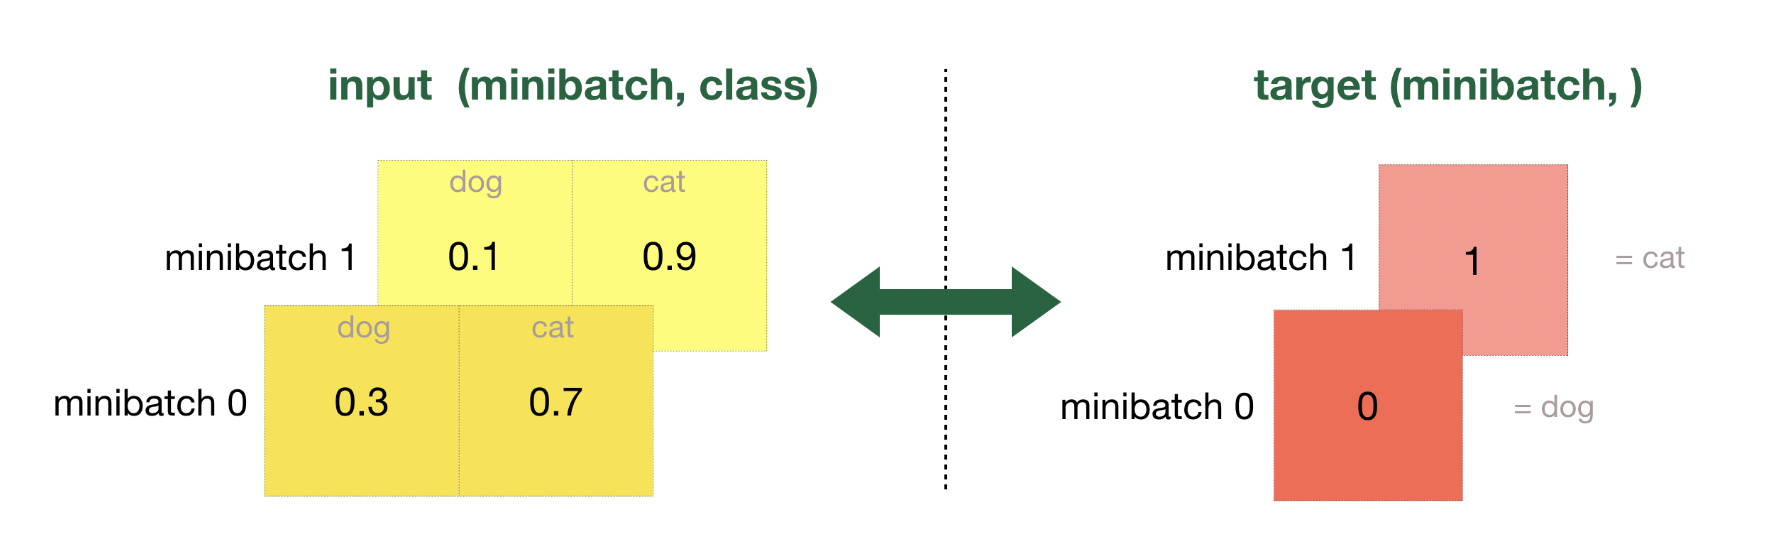

In [359]:
##15. Training 시작

for i in range(100):
    optimizer.zero_grad() #gd 초기화
    outputs = net(X) 
    ##문제(7) : outputs, Y 형태 그대로 넣으면 안되죠. view 함수를 이용해 loss값을 계산해봅시다.
    #criterion(A, B)에서  A의 크기를 (배치 크기)x(클래스 수), B의 크기를 (배치 크기)로 입력 받도록 정의하였습니다. (B에는 사실 정답클래스 1개가 곱해져 있는 셈이다)

    #기존 Y.shape = 185 *13, output.shape = 185 * 13 * 26
    loss = criterion(outputs.view(Y.view(-1).size(0),-1), Y.view(-1)) #Y.view(-1) : 185*13 = 2405 (배치크기가 됨)
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = ""
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([world_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += world_set[result[-1]]

    print(predict_str)

oooBugoosusuofuoosoooufsuooufooguuoouguuuuugssfuosfuosouogosofuosouofuBggoostsuofuoofuosooououugooouusutsfusoufuoofuoouuuuososuoguuosofuosouofuBggoostsuofuoosooououuosooussusoououuouuouuouufuosouuo
oosastttttttttutt o uutttutttuottuttutttttttttttttttt tuttt ottt out utttttttttttuooaut o uutttttuottttttttttttttst ooutttt uttttttt ottt out utttttttttttutt o uuttttstttttttttttttttttuuttuttt tttt
o t  t   t tt  tt    ttt ttt    t tt  ttttttttttt   t t  t  t tt   t    t   t tt      t    t  tt    t ttt  ttttt       t tt t tt ttt t tt   t    t   t tt  tt    t  t  t tttt t tt ttttt tt   tt t   
t                                                                                                                                                                                                    
t                                                                                                                                                                                                    
t         

In [360]:
predict_str

"rick walls are there tor a reaton and you must not think that the brick walls are 't there to seep us hut, but rather in this wal that the brick walls are there to show us how badly we wanl thenksd"

In [361]:
sentence

"Brick walls are there for a reason and you must not think that the brick walls aren't there to keep us out, but rather in this way that the brick walls are there to show us how badly we want things."

원문과 비교해도 그럴싸한 문장이 나왔다

## Task2

위 sentence는 제가 임의로 생성한 문장들입니다.

마음에 드시는 문구 가져오셔서 문장이 어떻게 생성되는지 확인해보세요! 

영어가 아닌 한국어로 시도해보는 것도 좋겠죠? 

수정이 많이 필요(토큰화 등) 할 수 있으나 한번 시도해보시는 것 권장드립니다 :)

위 베이스라인은 어디든 수정하셔도 좋고 조금 더 자연스러운 문장이 나올 수 있게 다양한 시도를 해보세요!

조건 : 문장 3개 이상, 연결성이 있는 문장을 " " 으로 구분하여 ( )에 넣기

형태소 분석기를 이용한 토큰화 준비

In [362]:
#1. 생성할 문장 데이터

sentence = ("경마장에 있는 말이 뛰고 있다 "
            "그 말은 정말 우람하고 위풍당당하다 "
            "또한 그 말은 세상에서 제일 빠른 말이기도 하다 " 
            "아무도 그의 독주를 막을 수 없다 "
            "지금까지 본 말 중 가장 말이 안되는 말이다")

In [363]:
# !git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
# %cd Mecab-ko-for-Google-Colab
# !bash install_mecab-ko_on_colab190912.sh

In [364]:
#토크나이저로 Mecab 사용
#형태소로 이루어진 문자 집합 만들기 
from konlpy.tag import Mecab 
tokenizer = Mecab()
word = tokenizer.morphs(sentence)
word_set = list(set(word)) #중복 X

In [365]:
#각 문자에 정수 인코딩
vocab = dict(sorted({i:n for n,i in enumerate(word_set)}.items(), key= lambda x: x[1]))

In [366]:
print(vocab)

{'정말': 0, '경마장': 1, '세상': 2, '있': 3, '본': 4, '수': 5, '뛰': 6, '안': 7, '독주': 8, '지금': 9, '되': 10, '말': 11, '빠른': 12, '제일': 13, '우람': 14, '에서': 15, '은': 16, '또한': 17, '고': 18, '의': 19, '는': 20, '위풍당당': 21, '다': 22, '도': 23, '하': 24, '기': 25, '에': 26, '을': 27, '이': 28, '막': 29, '까지': 30, '아무': 31, '가장': 32, '중': 33, '없': 34, '를': 35, '그': 36}


In [367]:
# 형태소 집합 크기 확인
vocab_size = len(vocab)
print('형태소 집합 크기 : {}'.format(vocab_size))

형태소 집합 크기 : 37


In [368]:
print(len(word),len(sentence))  #형태소 토큰화된 문장의 길이, #문장의 길이

59 107


In [369]:
#4. 하이퍼 파라미터 설정(자유롭게 수정해보세요!)

hidden_size = vocab_size # 같아야 하는 것 확인! = 은닉층 size
sequence_length = 5 # 너무 길거나 너무 짧게 잡으면 안됩니다!
learning_rate = 0.005

In [370]:
#5. seqence 길이 단위 자르기

# 데이터 구성을 위한 리스트
x_data = []
y_data = []


## 반복문 내에서의 인덱싱을 사용하여 sequence_length 값 단위로 샘플을 잘라 데이터 만들기, y_str은 x_str에서 한 칸씩 쉬프트된 sequnce

for i in range(0, len(word) - (sequence_length)):
    x_str = word[i:i+sequence_length]
    y_str = word[i+1:i+1+sequence_length] #sequence length를 유지해야한다.
    print(i, x_str, "->", y_str)

  # x_str과 y_str이 문자집합에 해당하는 인덱스를 각각 x_data, y_data에 append
    x_data.append([vocab[c] for c in x_str])
    y_data.append([vocab[d] for d in y_str])

0 ['경마장', '에', '있', '는', '말'] -> ['에', '있', '는', '말', '이']
1 ['에', '있', '는', '말', '이'] -> ['있', '는', '말', '이', '뛰']
2 ['있', '는', '말', '이', '뛰'] -> ['는', '말', '이', '뛰', '고']
3 ['는', '말', '이', '뛰', '고'] -> ['말', '이', '뛰', '고', '있']
4 ['말', '이', '뛰', '고', '있'] -> ['이', '뛰', '고', '있', '다']
5 ['이', '뛰', '고', '있', '다'] -> ['뛰', '고', '있', '다', '그']
6 ['뛰', '고', '있', '다', '그'] -> ['고', '있', '다', '그', '말']
7 ['고', '있', '다', '그', '말'] -> ['있', '다', '그', '말', '은']
8 ['있', '다', '그', '말', '은'] -> ['다', '그', '말', '은', '정말']
9 ['다', '그', '말', '은', '정말'] -> ['그', '말', '은', '정말', '우람']
10 ['그', '말', '은', '정말', '우람'] -> ['말', '은', '정말', '우람', '하']
11 ['말', '은', '정말', '우람', '하'] -> ['은', '정말', '우람', '하', '고']
12 ['은', '정말', '우람', '하', '고'] -> ['정말', '우람', '하', '고', '위풍당당']
13 ['정말', '우람', '하', '고', '위풍당당'] -> ['우람', '하', '고', '위풍당당', '하']
14 ['우람', '하', '고', '위풍당당', '하'] -> ['하', '고', '위풍당당', '하', '다']
15 ['하', '고', '위풍당당', '하', '다'] -> ['고', '위풍당당', '하', '다', '또한']
16 ['고', '위풍당당', '하', '다', '또한'] -> ['

In [371]:
print(len(x_data),len(y_data))

54 54


In [372]:
print(x_data[0],y_data[0]) #한 칸씩 shift된 것을 확인할 수 있었다.

[1, 26, 3, 20, 11] [26, 3, 20, 11, 28]


In [373]:
##6. 입력 시퀀스에 대해 원핫인코딩 수행

x_one_hot = [np.eye(vocab_size)[i] for i in x_data] #np.eye(one_hot encoding 번호 개수)[one_hot encoding을 진행할 list]

##7. 입력 데이터, 레이블데이터 텐서로 변환
##
X = torch.FloatTensor(x_one_hot) #학습할때 연산이 들어가므로 FloatTensor
Y = torch.LongTensor(y_data) #sequence의 index = 정수 >> LongTensor

#FloatTensor: 연산용
#LongTensor: int형 숫자

In [374]:
##8. 크기 확인
print('훈련 데이터의 크기 : {}'.format(X.shape))
print('레이블의 크기 : {}'.format(Y.shape))

훈련 데이터의 크기 : torch.Size([54, 5, 37])
레이블의 크기 : torch.Size([54, 5])


In [375]:
##9. RNN 모델 구현

class Net(torch.nn.Module):
  def __init__(self, input_dim, hidden_dim, layers):
    super(Net, self).__init__()
    self.rnn = torch.nn.RNN(input_dim, hidden_dim, num_layers = layers, batch_first = True)  
    #input_dim: 훈련 데이터셋의 특성 개수(칼럼 개수) / hidden_dim: 은닉층의 뉴런 개수
    #num_layers = RNN layer 개수 / batch_first : False(default), 입력 데이터 형태 = 시퀀스 길이, 배치크기, 특성 개수 / True일때는 입력 데이터 형태: 배치크기, 시퀀스 길이, 특성개수
    self.fc = torch.nn.Linear(hidden_dim, vocab_size) #label 38개
  
  def forward(self, x):
    h_0 = torch.zeros(2,len(x),hidden_size) # 2, 54, 38 : 최초 은닉 상태의 값 0으로 초기화
    x,_ = self.rnn(x,h_0) # 튜플의 첫번째 요소만 가져간다.
    x = self.fc(x) 

    return x

In [376]:
net = Net(vocab_size, hidden_size, 2) #hidden_size = vocab_size >> Net(38,38,2)

In [377]:
##12. loss function
criterion = torch.nn.CrossEntropyLoss() 

##13. optimizer
optimizer = optim.Adam(net.parameters(), learning_rate)

In [378]:
##14. 출력 크기 점검
outputs = net(X)
print(outputs.shape) 
print(Y.shape)

torch.Size([54, 5, 37])
torch.Size([54, 5])


In [379]:
##15. Training 시작

for i in range(100):
    optimizer.zero_grad() #gd 초기화
    outputs = net(X) 
    #criterion(A, B)에서  A의 크기를 (배치 크기)x(클래스 수), B의 크기를 (배치 크기)로 입력 받도록 정의하였습니다. (B에는 사실 정답클래스 1개가 곱해져 있는 셈이다)

    #기존 Y.shape = 54 *5, output.shape = 54 * 5 * 38
    loss = criterion(outputs.view(Y.view(-1).size(0),-1), Y.view(-1)) #Y.view(-1) : 54*5 = 270 (배치크기가 됨)
    loss.backward()
    optimizer.step()

    #16. 예측결과 확인
    results = outputs.argmax(dim=2)
    predict_str = "경마장"  #맨처음 단어는 예측할 수 없으므로 초깃값으로 설정한다.
    for j, result in enumerate(results):
        if j == 0: # 처음에는 예측 결과를 전부 가져오기
            predict_str += ''.join([word_set[t] for t in result])
        else: # 그 다음에는 마지막 글자만 반복 추가
            predict_str += word_set[result[-1]]

    print(predict_str)

경마장아무아무본아무아무아무아무아무아무아무아무본아무아무아무본아무아무본아무아무아무아무아무아무아무아무아무아무아무아무본아무아무아무아무아무본아무아무아무아무아무아무아무아무아무아무아무본아무아무아무아무본아무아무아무
경마장아무아무고아무이아무이이이아무이아무아무아무아무이이아무이아무이이아무아무이아무그아무아무이이본이아무그이아무본아무이이아무아무이이이아무아무아무이이아무아무아무이아무이아무
경마장아무아무말그이이이이이이말이이말말말이이이이이이이이이말이말이이이말이이이이이이말이이이말이이이말말이이말이말이이이이이
경마장이말말말이말이이이이말말말말말말이말이말이말말말이말이말말이이말이이이말말말말이말말말이이이말말이이말말말이말말이말
경마장이말말말이말말이말말말말말말말말이말말말이말말말말말이말말말이말말말말말말말말말말말말이말말말말이말말말말이말말이말
경마장이말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말이말말말말말말말말말말말말이말
경마장이말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말
경마장말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말
경마장말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말
경마장말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말
경마장말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말
경마장말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말말다말말말말말말말말말말말말말말
경마장말말말말말말말말말말말은말말말말말말말말말말은말말말말말말말말말말말말말말은말말말말말다말말말말그말말말말다말말말말
경마장말말말말말말다하다그말은말말하말하말다말말말은기에서제일말말말다다하다하말말말은말그말말말다말말말말그말말이말다말말이말
경마장말말말말말말다하다하말은말말하말하말다말다말은기에서제일말말이다다하다하말그말독주말그을말말

In [380]:
predict_str

'경마장에있는말이뛰고있다그말은정말우람하고위풍당당하다또한그말은세상에서제일빠른말이기도하다아무도그의독주를막을수없다지금까지본말중가장말이안되는말이다'

In [381]:
sentence

'경마장에 있는 말이 뛰고 있다 그 말은 정말 우람하고 위풍당당하다 또한 그 말은 세상에서 제일 빠른 말이기도 하다 아무도 그의 독주를 막을 수 없다 지금까지 본 말 중 가장 말이 안되는 말이다'

띄어쓰기와 초기값을 제외한 모든 단어를 정확하게 예측할 수 있었다.

learning_rate는 너무 크거나 작으면 예측이 잘 되지 않았고 0.005가 적당했다
epoch도 100 이상은 되어야 정확하게 예측할 수 있었다
띄어쓰기까지 고려한 예측은 추가적으로 연구를 해봐야겠다